In [1]:
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir("D:/credit suisse")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import lfilter

In [4]:
df1=pd.read_csv('TCS.NS.csv')
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-29,1365.000000,1384.699951,1365.000000,1370.750000,1257.738403,1984458.0
1,2013-04-30,1368.000000,1382.000000,1365.000000,1378.400024,1264.757568,2010285.0
2,2013-05-02,1373.500000,1438.800049,1373.500000,1433.900024,1315.682007,2815163.0
3,2013-05-03,1426.000000,1447.250000,1407.900024,1418.500000,1301.551514,1820895.0
4,2013-05-06,1420.000000,1472.400024,1420.000000,1467.199951,1346.236328,1863559.0
5,2013-05-07,1467.099976,1478.849976,1457.400024,1471.599976,1350.273682,1130090.0
6,2013-05-08,1472.000000,1487.800049,1470.000000,1480.099976,1358.072998,884065.0
7,2013-05-09,1483.199951,1503.449951,1483.000000,1498.449951,1374.910156,974850.0
8,2013-05-10,1498.449951,1510.900024,1491.099976,1495.900024,1372.570557,569857.0
9,2013-05-13,1480.000000,1481.000000,1445.699951,1451.599976,1331.922729,931249.0


In [5]:
df1.shape

(1234, 7)

In [6]:
df1=df1.iloc[:-17]

In [7]:
df1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [8]:
df1['Date']=pd.to_datetime(df1['Date'])

In [9]:
df1.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [10]:
df1.fillna(df1.mean(),inplace=True)

In [11]:
close_zero=df1.iloc[-1].Close

In [12]:
df1['HL_PCT'] = (df1['High'] - df1['Low'])/(df1['Low']*100)

In [13]:
df1['PCT_CHNG_OpCl'] = (df1['Close'] - df1['Open'])/(df1['Open']*100)

In [14]:
df1['PCT_CHNG_CLOSE'] = (df1['Close'] - df1['Adj Close'])/(df1['Adj Close']*100)

In [15]:
df1.index=df1['Date']

In [16]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE
Date,,,,,,,,,,
2013-04-29,2013-04-29,1365.0,1384.699951,1365.000000,1370.750000,1257.738403,1984458.0,0.000144,0.000042,0.000899
2013-04-30,2013-04-30,1368.0,1382.000000,1365.000000,1378.400024,1264.757568,2010285.0,0.000125,0.000076,0.000899
2013-05-02,2013-05-02,1373.5,1438.800049,1373.500000,1433.900024,1315.682007,2815163.0,0.000475,0.000440,0.000899
2013-05-03,2013-05-03,1426.0,1447.250000,1407.900024,1418.500000,1301.551514,1820895.0,0.000279,-0.000053,0.000899
2013-05-06,2013-05-06,1420.0,1472.400024,1420.000000,1467.199951,1346.236328,1863559.0,0.000369,0.000332,0.000899


In [17]:
df=df1[['Open','High','Low','Adj Close','Volume','HL_PCT','PCT_CHNG_OpCl','PCT_CHNG_CLOSE','Close']]

## Prediction for 30th Day

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
import datetime

C:\Users\Debadri\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


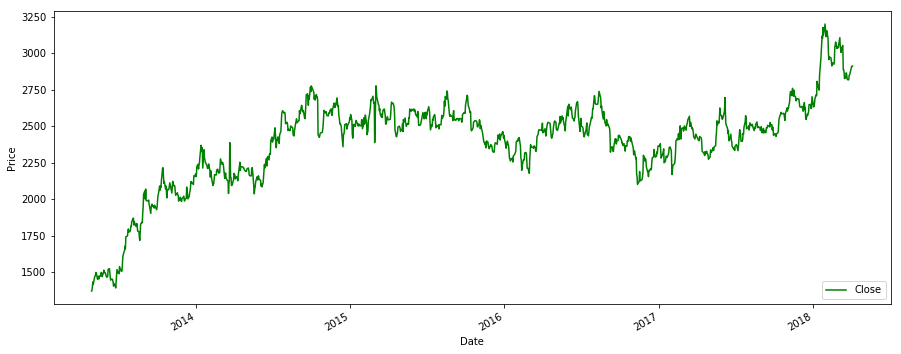

In [19]:
df['Close'].plot(figsize=(15,6), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [20]:
df.tail()

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close
Date,,,,,,,,,
2018-03-27,2825.000000,2863.000000,2823.050049,2847.699951,1247287.0,0.000142,0.000080,0.0,2847.699951
2018-03-28,2835.899902,2875.000000,2825.000000,2849.149902,3432827.0,0.000177,0.000047,0.0,2849.149902
2018-04-02,2840.000000,2914.000000,2840.000000,2909.649902,831494.0,0.000261,0.000245,0.0,2909.649902
2018-04-03,2892.100098,2929.899902,2892.100098,2911.250000,968645.0,0.000131,0.000066,0.0,2911.250000
2018-04-04,2929.449951,2934.000000,2892.000000,2910.899902,1420910.0,0.000145,-0.000063,0.0,2910.899902


In [21]:
forecast_col = 'Close'

forecast_out = int(42)
# We will drop 12 columns because there are 12 holidays

In [22]:
df['label'] = df[forecast_col].shift(-forecast_out)
print(df.head(2))

              Open         High     Low    Adj Close     Volume    HL_PCT  \
Date                                                                        
2013-04-29  1365.0  1384.699951  1365.0  1257.738403  1984458.0  0.000144   
2013-04-30  1368.0  1382.000000  1365.0  1264.757568  2010285.0  0.000125   

            PCT_CHNG_OpCl  PCT_CHNG_CLOSE        Close        label  
Date                                                                 
2013-04-29       0.000042        0.000899  1370.750000  1491.900024  
2013-04-30       0.000076        0.000899  1378.400024  1518.150024  


In [23]:
X = np.array(df.drop(['label'], 1))

In [24]:
X = preprocessing.scale(X)

In [25]:
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]

In [26]:
y = np.array(df['label'])
y = y[:-forecast_out]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [28]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print("Accuracy of our prediction model",clf.score(X_test, y_test)*100,"%")

Accuracy of our prediction model 70.91318861769749 %


In [30]:
# Taking first 30 values since 12 days are holidays

forecast_prediction = clf.predict(X_forecast_out)
print(forecast_prediction[:30])

[3073.42900527 3046.9006216  3065.77731677 3011.02185071 2951.23674289
 2950.81099874 2948.04811105 2927.86516066 2958.20165122 2903.84909202
 2936.39152234 2909.66455896 2940.0479253  2941.3141983  2946.30092797
 3004.50400209 2983.72901732 3027.54621183 3036.32029751 3017.12224017
 3040.15183543 3019.96354498 3012.80550078 3013.17480881 2998.82911814
 2985.13997581 3033.7737287  1439.33394261 2877.92968412 2892.8055986 ]


In [31]:
df['forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [32]:
df

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-29 00:00:00,1365.000000,1384.699951,1365.000000,1257.738403,1984458.0,0.000144,0.000042,0.000899,1370.750000,1491.900024,NaN
2013-04-30 00:00:00,1368.000000,1382.000000,1365.000000,1264.757568,2010285.0,0.000125,0.000076,0.000899,1378.400024,1518.150024,NaN
2013-05-02 00:00:00,1373.500000,1438.800049,1373.500000,1315.682007,2815163.0,0.000475,0.000440,0.000899,1433.900024,1492.349976,NaN
2013-05-03 00:00:00,1426.000000,1447.250000,1407.900024,1301.551514,1820895.0,0.000279,-0.000053,0.000899,1418.500000,1500.550049,NaN
2013-05-06 00:00:00,1420.000000,1472.400024,1420.000000,1346.236328,1863559.0,0.000369,0.000332,0.000899,1467.199951,1489.800049,NaN
2013-05-07 00:00:00,1467.099976,1478.849976,1457.400024,1350.273682,1130090.0,0.000147,0.000031,0.000899,1471.599976,1538.300049,NaN
2013-05-08 00:00:00,1472.000000,1487.800049,1470.000000,1358.072998,884065.0,0.000121,0.000055,0.000899,1480.099976,1530.199951,NaN
2013-05-09 00:00:00,1483.199951,1503.449951,1483.000000,1374.910156,974850.0,0.000138,0.000103,0.000899,1498.449951,1506.650024,NaN
2013-05-10 00:00:00,1498.449951,1510.900024,1491.099976,1372.570557,569857.0,0.000133,-0.000017,0.000899,1495.900024,1504.900024,NaN


In [33]:
pred=df[-42:]

In [34]:
df=df[:-42]

In [35]:
pred

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-04-05 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3073.429005
2018-04-06 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3046.900622
2018-04-07 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3065.777317
2018-04-08 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3011.021851
2018-04-09 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2951.236743
2018-04-10 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2950.810999
2018-04-11 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2948.048111
2018-04-12 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927.865161
2018-04-13 05:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2958.201651


In [36]:
pred=pred.reset_index()

In [37]:
pred['Date']=pred['Date'].dt.date

In [38]:
pred.head(1)

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3073.429005


In [39]:
holidays=['2018-04-07','2018-04-08','2018-04-14','2018-04-15','2018-04-21','2018-04-22','2018-04-28','2018-04-29','2018-05-01','2018-05-05','2018-05-06','2018-05-12','2018-05-13']

In [40]:
pred['Date']=pred['Date'].apply(str)

In [41]:
for i in holidays:
    pred = pred.drop(pred[pred.Date==i].index)

In [42]:
pred['Date']=pd.to_datetime(pred['Date'])

In [43]:
pred.drop('forecast',axis=1,inplace=True)

In [44]:
pred.shape

(29, 11)

In [45]:
pred['forecast']=forecast_prediction[:29]

In [46]:
pred

,Date,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
0,2018-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3073.429005
1,2018-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3046.900622
4,2018-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3065.777317
5,2018-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3011.021851
6,2018-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2951.236743
7,2018-04-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2950.810999
8,2018-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2948.048111
11,2018-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2927.865161
12,2018-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2958.201651
13,2018-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2903.849092


In [47]:
pred.index=pred['Date']
pred.drop('Date',axis=1,inplace=True)

In [48]:
df=df.append(pred)

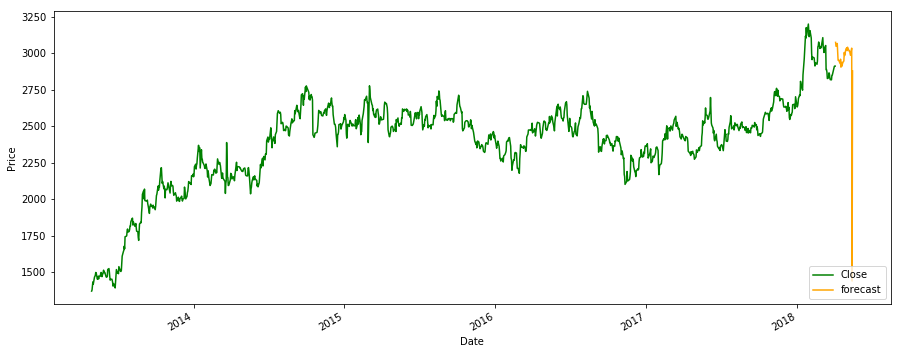

In [49]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

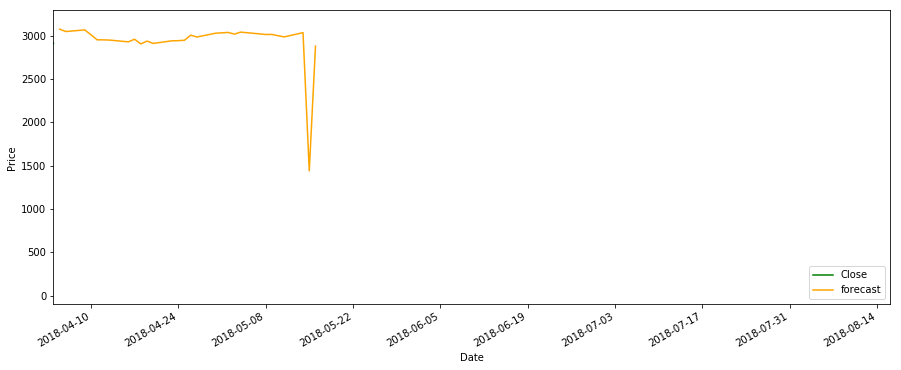

In [50]:
df['Close'].plot(figsize=(15,6), color="green")
df['forecast'].plot(figsize=(15,6), color="orange")
plt.xlim(xmin=datetime.date(2018, 4, 4))
plt.ylim(ymin=-100)
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [51]:
df.iloc[-1]

Open                      NaN
High                      NaN
Low                       NaN
Adj Close                 NaN
Volume                    NaN
HL_PCT                    NaN
PCT_CHNG_OpCl             NaN
PCT_CHNG_CLOSE            NaN
Close                     NaN
label                     NaN
forecast          2877.929684
Name: 2018-05-16 00:00:00, dtype: float64

In [52]:
close_last=df.iloc[-1].forecast

In [53]:
pred_return=close_last-close_zero
print("Predicted Return: Rs.",pred_return)

Predicted Return: Rs. -32.97021787922995


## Simple Moving Average (30,40,50)

In [54]:
# For 30 days
short_rolling = df.rolling(window=30).mean()
short_rolling.head(30)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2013-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# For 40 days
med_rolling = df.rolling(window=40).mean()
med_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# For 50 days
long_rolling = df.rolling(window=50).mean()
long_rolling.tail(10)

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,forecast
Date,,,,,,,,,,,
2018-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Price in Rs.')

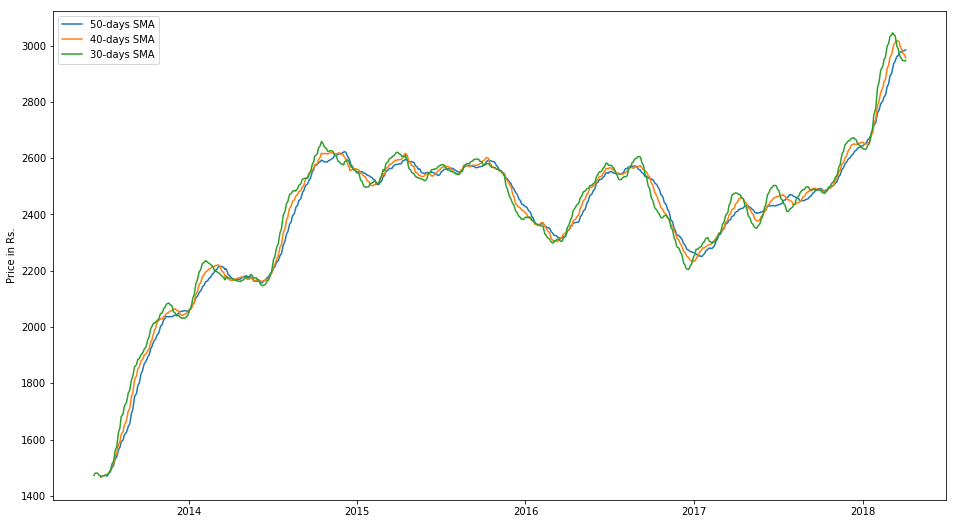

In [57]:
start_date = '2013-04-29'
end_date = '2018-04-04'

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Close'], label = '50-days SMA')
ax.plot(med_rolling.loc[start_date:end_date, :].index, med_rolling.loc[start_date:end_date, 'Close'], label = '40-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Close'], label = '30-days SMA')


ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')


## Exponential Moving Average (30,40,50)

Text(0,0.5,'Price in Rs.')

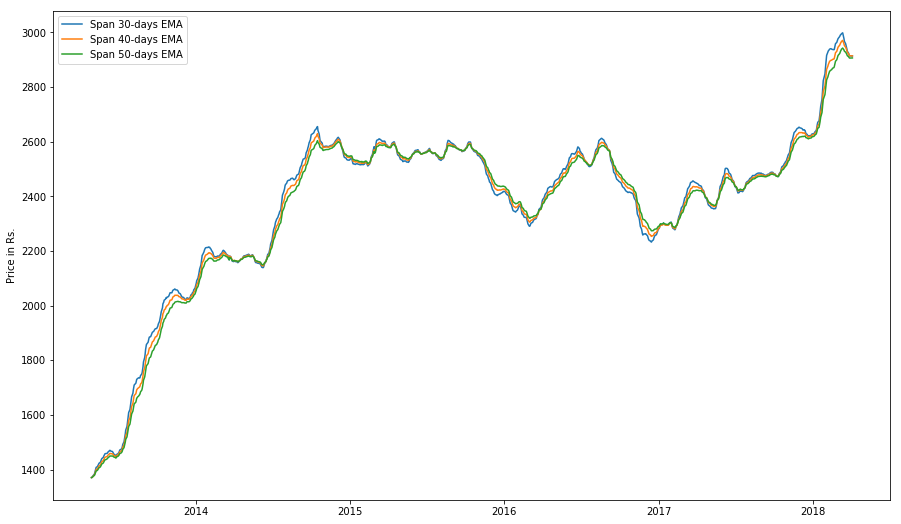

In [58]:
ema_short = df.ewm(span=30, adjust=False).mean()
ema_med = df.ewm(span=40, adjust=False).mean()
ema_long = df.ewm(span=50, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'Close'], label = 'Span 30-days EMA')
ax.plot(ema_med.loc[start_date:end_date, :].index, ema_med.loc[start_date:end_date, 'Close'], label = 'Span 40-days EMA')
ax.plot(ema_long.loc[start_date:end_date, :].index, ema_long.loc[start_date:end_date, 'Close'], label = 'Span 50-days EMA')

ax.legend(loc='best')
ax.set_ylabel('Price in Rs.')

## Aroon Oscillator (30,40,50)

In [59]:
from pandas.stats import moments
from pandas import DataFrame

In [60]:
def aroon(s, n):
    up = 100 * moments.rolling_apply(s.High, n + 1, lambda x: x.argmax()) / n
    dn = 100 * moments.rolling_apply(s.Low, n + 1, lambda x: x.argmin()) / n

    return DataFrame(dict(up=up, down=dn))

In [61]:
ao30=aroon(df,30)
ao40=aroon(df,40)
ao50=aroon(df,50)

In [62]:
ao30

,down,up
Date,,
2013-04-29,NaN,NaN
2013-04-30,NaN,NaN
2013-05-02,NaN,NaN
2013-05-03,NaN,NaN
2013-05-06,NaN,NaN
2013-05-07,NaN,NaN
2013-05-08,NaN,NaN
2013-05-09,NaN,NaN
2013-05-10,NaN,NaN


Text(0,0.5,'Change in Price in Rs.')

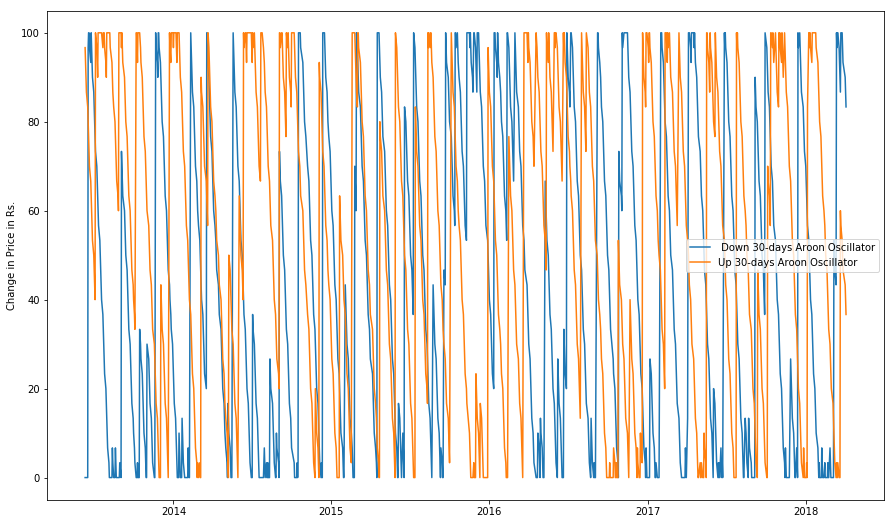

In [63]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 30-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 30-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

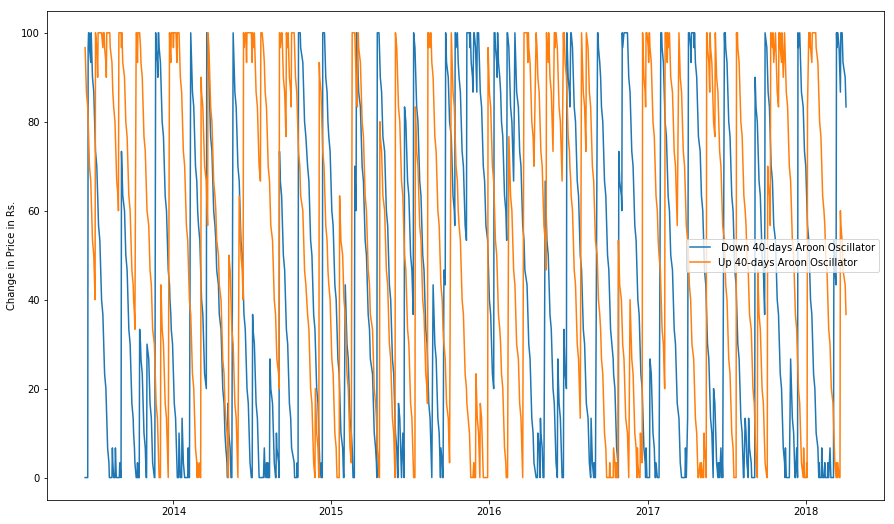

In [64]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'down'], label = ' Down 40-days Aroon Oscillator')
ax.plot(ao30.loc[start_date:end_date, :].index, ao30.loc[start_date:end_date, 'up'], label = 'Up 40-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

Text(0,0.5,'Change in Price in Rs.')

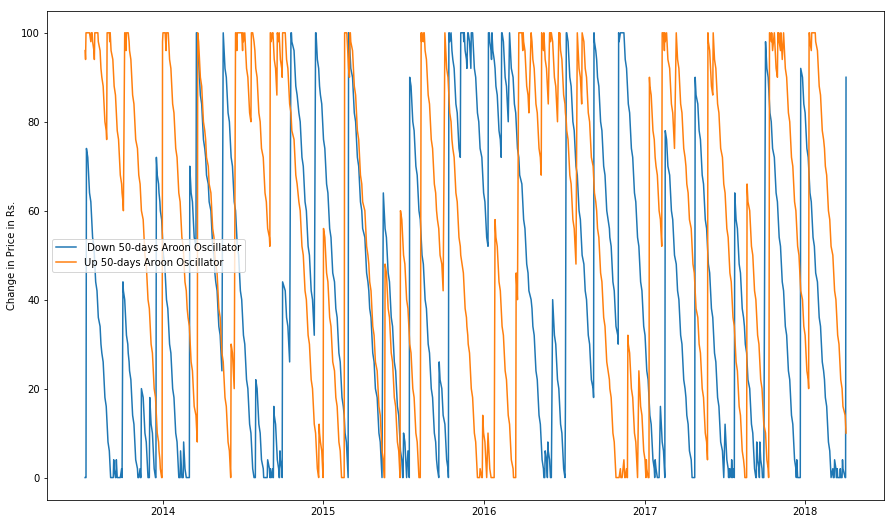

In [65]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'down'], label = ' Down 50-days Aroon Oscillator')
ax.plot(ao50.loc[start_date:end_date, :].index, ao50.loc[start_date:end_date, 'up'], label = 'Up 50-days Aroon Oscillator')


ax.legend(loc='best')
ax.set_ylabel('Change in Price in Rs.')

## MACD Signal

In [66]:
def ema(s, n, wilder=False):
    span = n if not wilder else 2*n - 1
    return moments.ewma(s, span=span)


def macd(s, nfast=12, nslow=26, nsig=9, percent=True):
    fast, slow = ema(s, nfast), ema(s, nslow)

    if percent:
        macd = 100*(fast / slow - 1)
    else:
        macd = fast - slow

    sig = ema(macd, nsig)
    hist = macd - sig

    return DataFrame(dict(macd=macd, signal=sig, hist=hist,
                          fast=fast, slow=slow))

In [67]:
m=macd(df['Close'])

In [68]:
m.head(1)

,fast,hist,macd,signal,slow
Date,,,,,
2013-04-29,1370.75,0.0,0.0,0.0,1370.75


Text(0,0.5,'Change ')

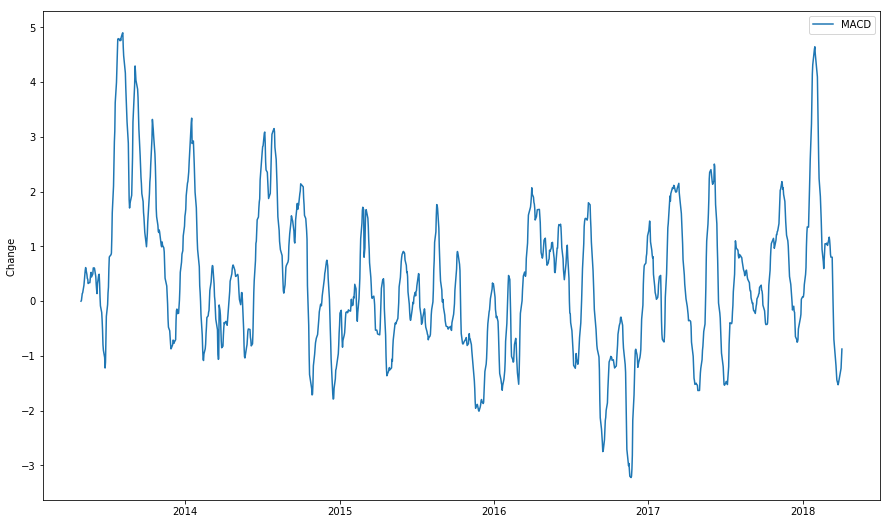

In [69]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(m.loc[start_date:end_date, :].index, m.loc[start_date:end_date, 'macd'], label = 'MACD')

ax.legend(loc='best')
ax.set_ylabel('Change ')

## Relative Strength Index (RSI)

In [70]:
def rsi(s, n=14):
    diff = s.diff()
    which_dn = diff < 0

    up, dn = diff, diff*0
    up[which_dn], dn[which_dn] = 0, -up[which_dn]

    emaup = ema(up, n, wilder=True)
    emadn = ema(dn, n, wilder=True)

    return 100 * emaup/(emaup + emadn)

In [71]:
sf=rsi(df['Close'],50)

In [72]:
sfd=pd.DataFrame({'Date':sf.index, 'RSI':sf.values})

In [73]:
sfd.index=sfd['Date']

Text(0,0.5,'Change')

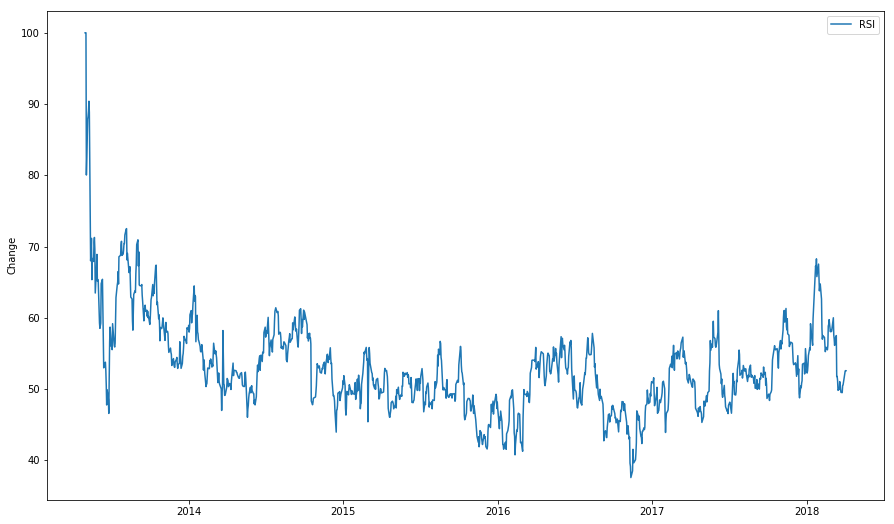

In [74]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(sfd.loc[start_date:end_date, :].index, sfd.loc[start_date:end_date, 'RSI'], label = 'RSI')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Bollinger Bands (30,40,50)

In [75]:
price=df["Close"]

def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    ave = pd.stats.moments.rolling_mean(price,length)
    sd = pd.stats.moments.rolling_std(price,length)
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

df['ave30'], df['upper30'], df['lower30'] = bbands(df.Close, length=30, numsd=1)
df['ave40'], df['upper40'], df['lower40'] = bbands(df.Close, length=40, numsd=1)
df['ave50'], df['upper50'], df['lower50'] = bbands(df.Close, length=50, numsd=1)

Text(0,0.5,'Change')

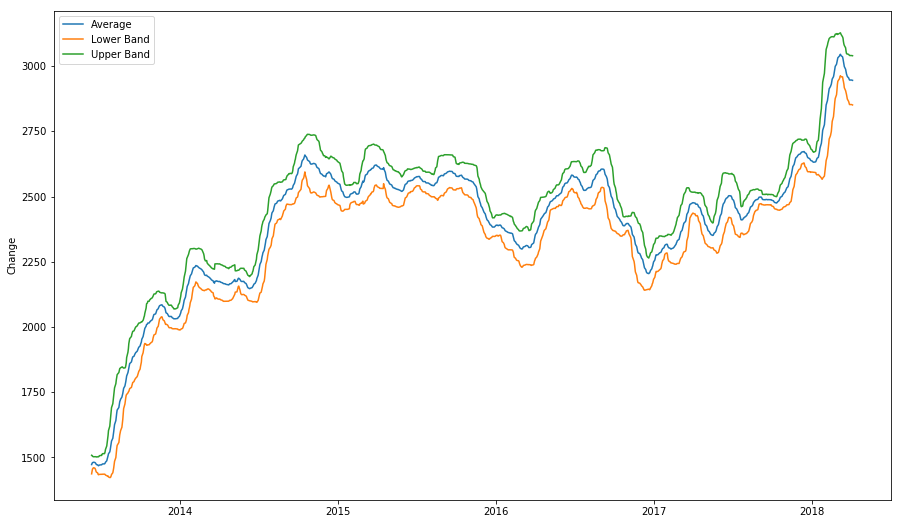

In [76]:
# For 30 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave30'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower30'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper30'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

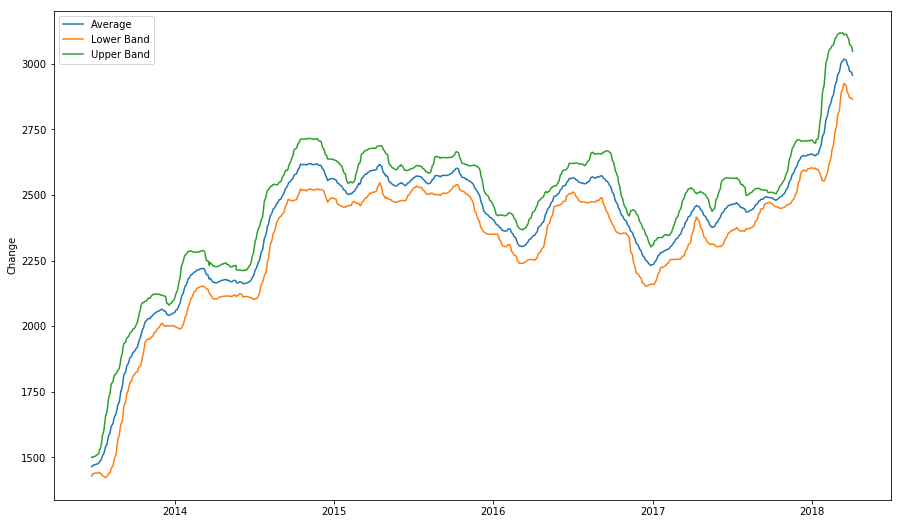

In [77]:
# For 40 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave40'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower40'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper40'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

Text(0,0.5,'Change')

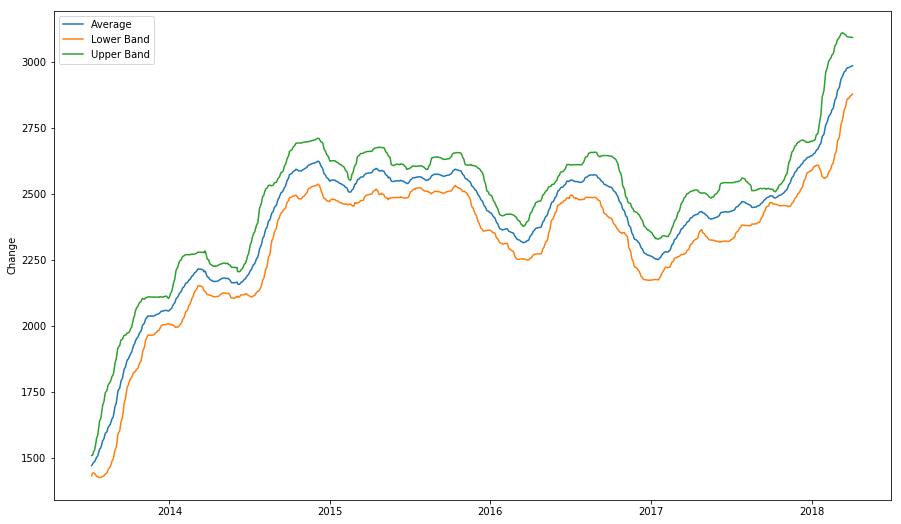

In [78]:
# For 50 days
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'ave50'], label = 'Average')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'lower50'], label = 'Lower Band')
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'upper50'], label = 'Upper Band')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Stochastic Oscillator

In [79]:
def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD

In [80]:
df['%K'] = STOK(df['Close'], df['Low'], df['High'], 14)
df['%D'] = STOD(df['Close'], df['Low'], df['High'], 14)

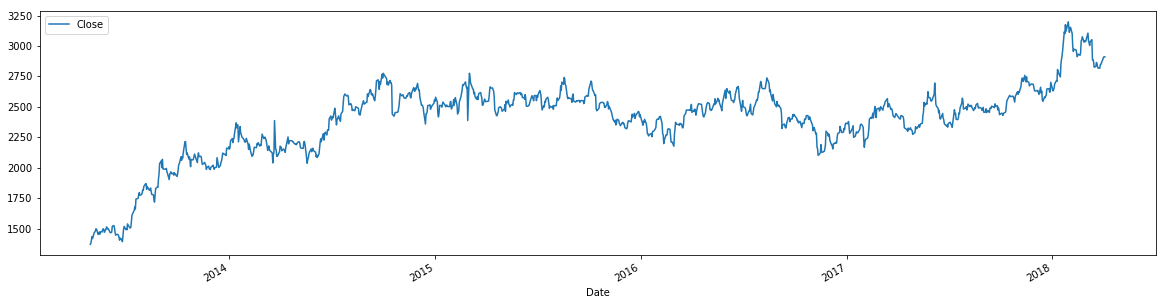

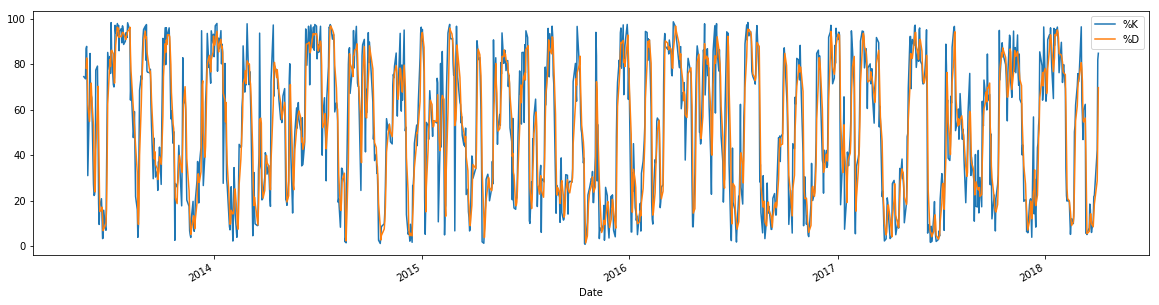

In [81]:
df.plot(y=['Close'], figsize = (20, 5))
df.plot(y=['%K', '%D'], figsize = (20, 5))

## Chande Oscillator

In [82]:
def avg_true_range(df): 
  ind = range(0,len(df))
  indexlist = list(ind)
  df.index = indexlist

  for index, row in df.iterrows():
    if index != 0:
      tr1 = row["High"] - row["Low"]
      tr2 = abs(row["High"] - df.iloc[index-1]["Close"])
      tr3 = abs(row["Low"] - df.iloc[index-1]["Close"])

      true_range = max(tr1, tr2, tr3)
      df.set_value(index,"True Range", true_range)

  df["Avg TR"] = df["True Range"].rolling(min_periods=14, window=14, center=False).mean()
  return df

In [83]:
def chandelier_exit(df):

  df_tr = avg_true_range(df)

  df_tr['rolling_high']= df_tr["High"]
  df_tr['rolling_low'] = df_tr["Low"]

  df_tr['chandelier_long'] = df_tr['rolling_high'] - df_tr["Avg TR"] * 3
  df_tr['chandelier_short'] = df_tr['rolling_low'] - df_tr["Avg TR"] * 3
  fig, ax = plt.subplots(figsize=(15,9))

  ax.plot(df_tr['Date'], df_tr['chandelier_long'], label = 'Chand Long')

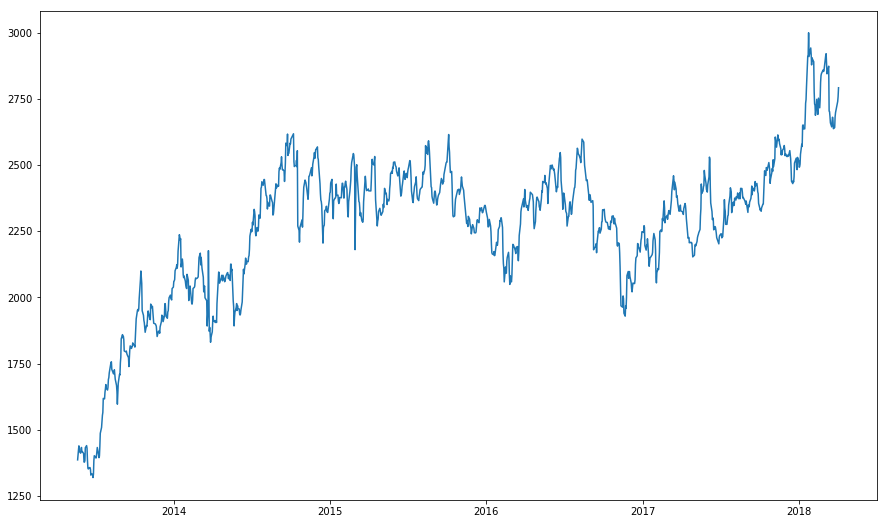

In [84]:
ch=chandelier_exit(df1)

## Commodity Channel Index (30,40,50)

In [85]:
def CCI(data, ndays): 
 TP = (data['High'] + data['Low'] + data['Close']) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, ndays)) / (0.015 * pd.rolling_std(TP, ndays)),
 name = 'CCI')
 data=data.join(CCI)
 return data

In [86]:
cci30=CCI(df,30)
cci40=CCI(df,40)
cci50=CCI(df,50)

In [87]:
cci30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,lower30,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,CCI
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-29,1365.000000,1384.699951,1365.000000,1257.738403,1984458.0,0.000144,0.000042,0.000899,1370.750000,1491.900024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,1368.000000,1382.000000,1365.000000,1264.757568,2010285.0,0.000125,0.000076,0.000899,1378.400024,1518.150024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,1373.500000,1438.800049,1373.500000,1315.682007,2815163.0,0.000475,0.000440,0.000899,1433.900024,1492.349976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03,1426.000000,1447.250000,1407.900024,1301.551514,1820895.0,0.000279,-0.000053,0.000899,1418.500000,1500.550049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-06,1420.000000,1472.400024,1420.000000,1346.236328,1863559.0,0.000369,0.000332,0.000899,1467.199951,1489.800049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-07,1467.099976,1478.849976,1457.400024,1350.273682,1130090.0,0.000147,0.000031,0.000899,1471.599976,1538.300049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-08,1472.000000,1487.800049,1470.000000,1358.072998,884065.0,0.000121,0.000055,0.000899,1480.099976,1530.199951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-09,1483.199951,1503.449951,1483.000000,1374.910156,974850.0,0.000138,0.000103,0.000899,1498.449951,1506.650024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-10,1498.449951,1510.900024,1491.099976,1372.570557,569857.0,0.000133,-0.000017,0.000899,1495.900024,1504.900024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0,0.5,'Change')

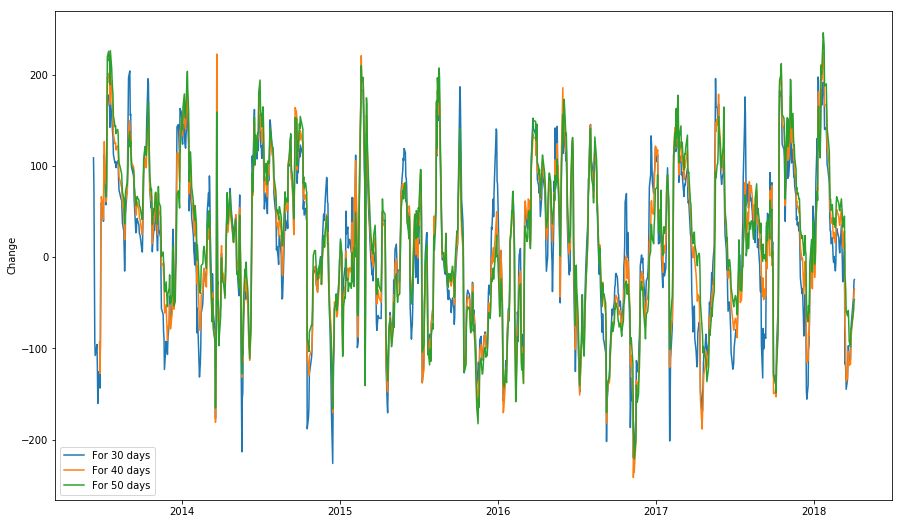

In [88]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(cci30.loc[start_date:end_date, :].index, cci30.loc[start_date:end_date, 'CCI'], label = 'For 30 days')
ax.plot(cci40.loc[start_date:end_date, :].index, cci40.loc[start_date:end_date, 'CCI'], label = 'For 40 days')
ax.plot(cci50.loc[start_date:end_date, :].index, cci50.loc[start_date:end_date, 'CCI'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Chakin Volatility Indicator (30,40,50)

In [89]:
def chaikin_oscillator(data, periods_short=3, periods_long=30, high_col='High',
                       low_col='Low', close_col='Close', vol_col='Volume'):
    ac = pd.Series([])

    for index, row in data.iterrows():
        if row[high_col] != row[low_col]:
            val = ((row[close_col] - row[low_col]) - (row[high_col] - row[close_col])) / (row[high_col] - row[low_col]) * row[vol_col]
        else:
            val = 0
        ac.set_value(index, val)

    ema_long = ac.ewm(ignore_na=False, min_periods=0, com=periods_long, adjust=True).mean()
    ema_short = ac.ewm(ignore_na=False, min_periods=0, com=periods_short, adjust=True).mean()
    data['ch_osc'] = ema_short - ema_long

    return data

In [90]:
ch30=chaikin_oscillator(df,3,30)
ch40=chaikin_oscillator(df,3,40)
ch50=chaikin_oscillator(df,3,50)

Text(0,0.5,'Change')

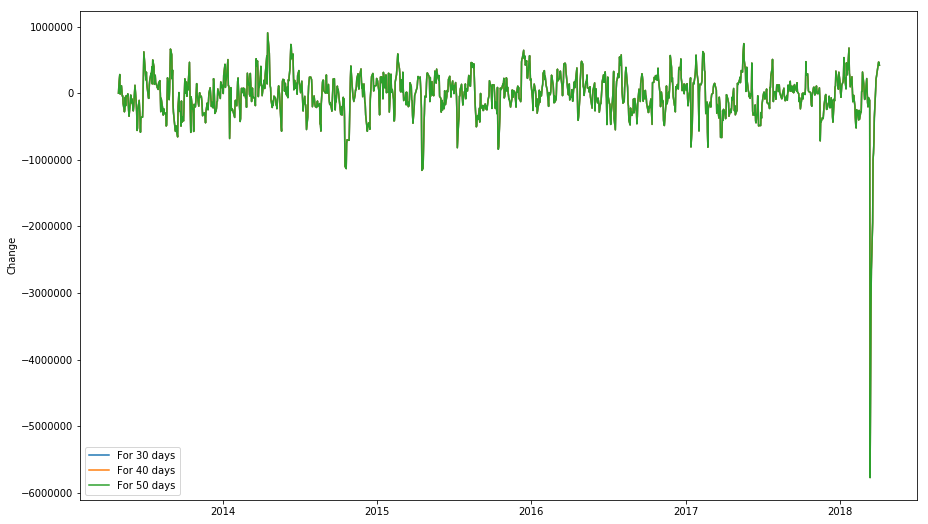

In [91]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(ch30.loc[start_date:end_date, :].index, ch30.loc[start_date:end_date, 'ch_osc'], label = 'For 30 days')
ax.plot(ch40.loc[start_date:end_date, :].index, ch40.loc[start_date:end_date, 'ch_osc'], label = 'For 40 days')
ax.plot(ch50.loc[start_date:end_date, :].index, ch50.loc[start_date:end_date, 'ch_osc'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

#overlapped each other

## Rate of Price Change (30,40,50)

In [92]:
def ROC(data,n):
 N = data['Close'].diff(n)
 D = data['Close'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [93]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [94]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-29,1365.000000,1384.699951,1365.000000,1257.738403,1984458.0,0.000144,0.000042,0.000899,1370.750000,1491.900024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-04-30,1368.000000,1382.000000,1365.000000,1264.757568,2010285.0,0.000125,0.000076,0.000899,1378.400024,1518.150024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131951.736960,NaN
2013-05-02,1373.500000,1438.800049,1373.500000,1315.682007,2815163.0,0.000475,0.000440,0.000899,1433.900024,1492.349976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279858.615481,NaN
2013-05-03,1426.000000,1447.250000,1407.900024,1301.551514,1820895.0,0.000279,-0.000053,0.000899,1418.500000,1500.550049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14033.355330,NaN
2013-05-06,1420.000000,1472.400024,1420.000000,1346.236328,1863559.0,0.000369,0.000332,0.000899,1467.199951,1489.800049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112698.433043,NaN
2013-05-07,1467.099976,1478.849976,1457.400024,1350.273682,1130090.0,0.000147,0.000031,0.000899,1471.599976,1538.300049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37108.047406,NaN
2013-05-08,1472.000000,1487.800049,1470.000000,1358.072998,884065.0,0.000121,0.000055,0.000899,1480.099976,1530.199951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43616.236985,NaN
2013-05-09,1483.199951,1503.449951,1483.000000,1374.910156,974850.0,0.000138,0.000103,0.000899,1498.449951,1506.650024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39362.383737,NaN
2013-05-10,1498.449951,1510.900024,1491.099976,1372.570557,569857.0,0.000133,-0.000017,0.000899,1495.900024,1504.900024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-154727.744026,NaN


Text(0,0.5,'Change')

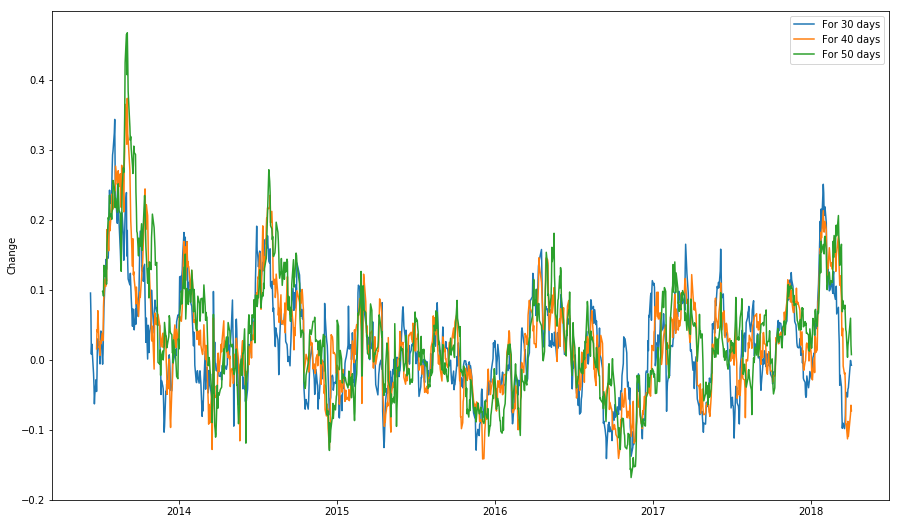

In [95]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')

## Rate of Volume Change (30,40,50)


In [96]:
def ROC(data,n):
 N = data['Volume'].diff(n)
 D = data['Volume'].shift(n)
 ROC = pd.Series(N/D,name='ROC')
 data = data.join(ROC)
 return data 

In [97]:
roc30=ROC(df,30)
roc40=ROC(df,40)
roc50=ROC(df,50)

In [98]:
roc30

,Open,High,Low,Adj Close,Volume,HL_PCT,PCT_CHNG_OpCl,PCT_CHNG_CLOSE,Close,label,...,ave40,upper40,lower40,ave50,upper50,lower50,%K,%D,ch_osc,ROC
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-29,1365.000000,1384.699951,1365.000000,1257.738403,1984458.0,0.000144,0.000042,0.000899,1370.750000,1491.900024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
2013-04-30,1368.000000,1382.000000,1365.000000,1264.757568,2010285.0,0.000125,0.000076,0.000899,1378.400024,1518.150024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131951.736960,NaN
2013-05-02,1373.500000,1438.800049,1373.500000,1315.682007,2815163.0,0.000475,0.000440,0.000899,1433.900024,1492.349976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279858.615481,NaN
2013-05-03,1426.000000,1447.250000,1407.900024,1301.551514,1820895.0,0.000279,-0.000053,0.000899,1418.500000,1500.550049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14033.355330,NaN
2013-05-06,1420.000000,1472.400024,1420.000000,1346.236328,1863559.0,0.000369,0.000332,0.000899,1467.199951,1489.800049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112698.433043,NaN
2013-05-07,1467.099976,1478.849976,1457.400024,1350.273682,1130090.0,0.000147,0.000031,0.000899,1471.599976,1538.300049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37108.047406,NaN
2013-05-08,1472.000000,1487.800049,1470.000000,1358.072998,884065.0,0.000121,0.000055,0.000899,1480.099976,1530.199951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43616.236985,NaN
2013-05-09,1483.199951,1503.449951,1483.000000,1374.910156,974850.0,0.000138,0.000103,0.000899,1498.449951,1506.650024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-39362.383737,NaN
2013-05-10,1498.449951,1510.900024,1491.099976,1372.570557,569857.0,0.000133,-0.000017,0.000899,1495.900024,1504.900024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-154727.744026,NaN


Text(0,0.5,'Change')

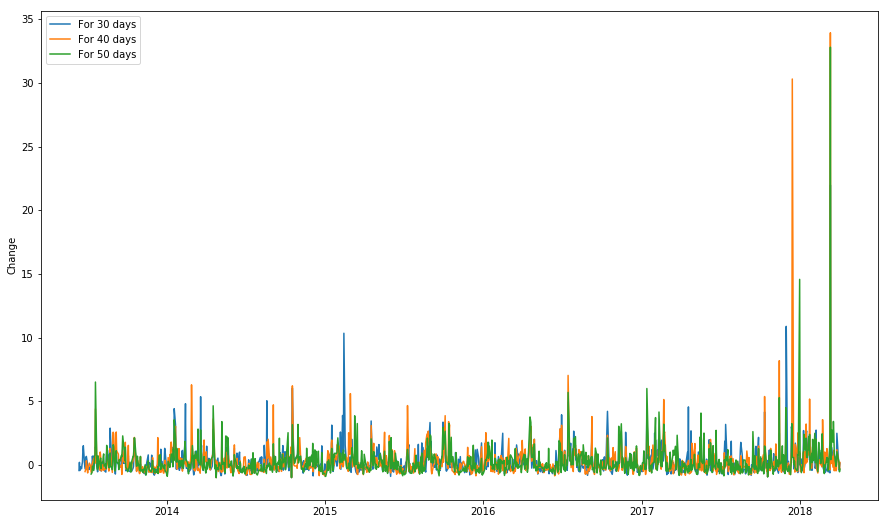

In [99]:
fig, ax = plt.subplots(figsize=(15,9))

ax.plot(roc30.loc[start_date:end_date, :].index, roc30.loc[start_date:end_date, 'ROC'], label = 'For 30 days')
ax.plot(roc40.loc[start_date:end_date, :].index, roc40.loc[start_date:end_date, 'ROC'], label = 'For 40 days')
ax.plot(roc50.loc[start_date:end_date, :].index, roc50.loc[start_date:end_date, 'ROC'], label = 'For 50 days')

ax.legend(loc='best')
ax.set_ylabel('Change')